# Multilayer Perceptron : 분류

### Jupyter Notebook 단축키
- ctrl+enter: 셀 실행
- shift+enter: 셀 실행 및 다음 셀 이동
- alt+enter: 셀 실행, 다음 셀 이동, 새로운 셀 생성
- a: 상단에 새로운 셀 만들기
- b: 하단에 새로운 셀 만들기
- dd: 셀 삭제(x: 셀 삭제)
- z: 셀 복구
- esc: 셀 나가기
- m: code -> markdown
- y: markdown -> code

## 0. 모듈 불러오기

In [6]:
''' 기본 모듈 및 시각화 모듈 '''
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

''' 데이터 전처리 모듈 '''
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

''' Multilayer Perceptron 모듈 '''
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

''' 결과 평가용 모듈 '''
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

''' 기타 optional'''
pd.options.display.float_format = '{:.4f}'.format

! git clone https://github.com/hansam95/LG_time_series_day08.git

fatal: destination path 'test' already exists and is not an empty directory.


## 1. 분석데이터: Parkinsons (이진 분류 문제)

<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large174.jpg" width="300"></img><br>
<a href='https://archive.ics.uci.edu/ml/datasets/Parkinsons'> https://archive.ics.uci.edu/ml/datasets/Parkinsons </a>

### 설명변수 (X): 환자의 특성
- name
- MDVP:Fo(Hz)
- MDVP:Fhi(Hz)
- MDVP:Flo(Hz)
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA
- NHR,HNR
- RPDE,D2
- DFA
- spread1,spread2,PPE

### 반응변수 (Y): 환자의 상태
- status: 0(정상), 1(파킨슨병)


### 데이터 불러오기

In [ ]:
data = pd.read_csv('./LG_time_series_day08/data/Parkinsons.csv')

## 1-1. 데이터 전처리 및 탐색적 데이터 분석

### 데이터 확인

In [5]:
print('Data shape: {}'.format(data.shape))
data.head()

Data shape: (195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.9920,157.3020,74.9970,0.0078,0.0001,0.0037,0.0055,0.0111,0.0437,...,0.0654,0.0221,21.0330,1,0.4148,0.8153,-4.8130,0.2665,2.3014,0.2847
1,phon_R01_S01_2,122.4000,148.6500,113.8190,0.0097,0.0001,0.0046,0.0070,0.0139,0.0613,...,0.0940,0.0193,19.0850,1,0.4584,0.8195,-4.0752,0.3356,2.4869,0.3687
2,phon_R01_S01_3,116.6820,131.1110,111.5550,0.0105,0.0001,0.0054,0.0078,0.0163,0.0523,...,0.0827,0.0131,20.6510,1,0.4299,0.8253,-4.4432,0.3112,2.3423,0.3326
3,phon_R01_S01_4,116.6760,137.8710,111.3660,0.0100,0.0001,0.0050,0.0070,0.0150,0.0549,...,0.0877,0.0135,20.6440,1,0.4350,0.8192,-4.1175,0.3341,2.4056,0.3690
4,phon_R01_S01_5,116.0140,141.7810,110.6550,0.0128,0.0001,0.0066,0.0091,0.0197,0.0643,...,0.1047,0.0177,19.6490,1,0.4174,0.8235,-3.7478,0.2345,2.3322,0.4103


In [6]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,...,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000
mean,154.2286,197.1049,116.3246,0.0062,0.0000,0.0033,0.0034,0.0099,0.0297,0.2823,...,0.0470,0.0248,21.8860,0.7538,0.4985,0.7181,-5.6844,0.2265,2.3818,0.2066
std,41.3901,91.4915,43.5214,0.0048,0.0000,0.0030,0.0028,0.0089,0.0189,0.1949,...,0.0305,0.0404,4.4258,0.4319,0.1039,0.0553,1.0902,0.0834,0.3828,0.0901
min,88.3330,102.1450,65.4760,0.0017,0.0000,0.0007,0.0009,0.0020,0.0095,0.0850,...,0.0136,0.0006,8.4410,0.0000,0.2566,0.5743,-7.9650,0.0063,1.4233,0.0445
25%,117.5720,134.8625,84.2910,0.0035,0.0000,0.0017,0.0019,0.0050,0.0165,0.1485,...,0.0247,0.0059,19.1980,1.0000,0.4213,0.6748,-6.4501,0.1744,2.0991,0.1375
50%,148.7900,175.8290,104.3150,0.0049,0.0000,0.0025,0.0027,0.0075,0.0230,0.2210,...,0.0384,0.0117,22.0850,1.0000,0.4960,0.7223,-5.7209,0.2189,2.3615,0.1941
75%,182.7690,224.2055,140.0185,0.0074,0.0001,0.0038,0.0040,0.0115,0.0379,0.3500,...,0.0608,0.0256,25.0755,1.0000,0.5876,0.7619,-5.0462,0.2792,2.6365,0.2530
max,260.1050,592.0300,239.1700,0.0332,0.0003,0.0214,0.0196,0.0643,0.1191,1.3020,...,0.1694,0.3148,33.0470,1.0000,0.6852,0.8253,-2.4340,0.4505,3.6712,0.5274


### 불필요한 변수 제거

In [10]:
# name 고유 개수
num_name = len(data['name'].unique())

print(f'name: {num_name}')

name: 195


In [11]:
# name 제거
data.drop(columns=['name'], inplace=True)

In [12]:
print('Data shape: {}'.format(data.shape))
data.head()

Data shape: (195, 23)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.9920,157.3020,74.9970,0.0078,0.0001,0.0037,0.0055,0.0111,0.0437,0.4260,...,0.0654,0.0221,21.0330,1,0.4148,0.8153,-4.8130,0.2665,2.3014,0.2847
1,122.4000,148.6500,113.8190,0.0097,0.0001,0.0046,0.0070,0.0139,0.0613,0.6260,...,0.0940,0.0193,19.0850,1,0.4584,0.8195,-4.0752,0.3356,2.4869,0.3687
2,116.6820,131.1110,111.5550,0.0105,0.0001,0.0054,0.0078,0.0163,0.0523,0.4820,...,0.0827,0.0131,20.6510,1,0.4299,0.8253,-4.4432,0.3112,2.3423,0.3326
3,116.6760,137.8710,111.3660,0.0100,0.0001,0.0050,0.0070,0.0150,0.0549,0.5170,...,0.0877,0.0135,20.6440,1,0.4350,0.8192,-4.1175,0.3341,2.4056,0.3690
4,116.0140,141.7810,110.6550,0.0128,0.0001,0.0066,0.0091,0.0197,0.0643,0.5840,...,0.1047,0.0177,19.6490,1,0.4174,0.8235,-3.7478,0.2345,2.3322,0.4103


### 클래스 비율 확인
0: 정상 <br>
1: 파킨슨병

In [13]:
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

### 설명변수(X)와 반응변수(Y) 정의

In [14]:
X = data.drop(labels='status', axis=1)
y = data['status']

In [15]:
display(X.head())
display(y.head())

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.9920,157.3020,74.9970,0.0078,0.0001,0.0037,0.0055,0.0111,0.0437,0.4260,...,0.0297,0.0654,0.0221,21.0330,0.4148,0.8153,-4.8130,0.2665,2.3014,0.2847
1,122.4000,148.6500,113.8190,0.0097,0.0001,0.0046,0.0070,0.0139,0.0613,0.6260,...,0.0437,0.0940,0.0193,19.0850,0.4584,0.8195,-4.0752,0.3356,2.4869,0.3687
2,116.6820,131.1110,111.5550,0.0105,0.0001,0.0054,0.0078,0.0163,0.0523,0.4820,...,0.0359,0.0827,0.0131,20.6510,0.4299,0.8253,-4.4432,0.3112,2.3423,0.3326
3,116.6760,137.8710,111.3660,0.0100,0.0001,0.0050,0.0070,0.0150,0.0549,0.5170,...,0.0377,0.0877,0.0135,20.6440,0.4350,0.8192,-4.1175,0.3341,2.4056,0.3690
4,116.0140,141.7810,110.6550,0.0128,0.0001,0.0066,0.0091,0.0197,0.0643,0.5840,...,0.0447,0.1047,0.0177,19.6490,0.4174,0.8235,-3.7478,0.2345,2.3322,0.4103


0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

### 학습 데이터(Training Dataset)와 테스트 데이터(Testing Dataset) 분리
- 학습데이터와 테스트 데이터의 클래스 비율이 달라지지 않도록 stratify 옵션 사용


In [16]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

### Matplotlib 을 이용한 클래스 비율 plotting
- plt.figure: plot을 그리기 위해 가장 먼저 선언 & plot 크기 지정
- plt.subplot: plot을 한번에 여러개 그리기 위해 선언(행크기/열크기/plot번호)
- plt.hist: 히스토그램
- plt.xlim: x축 (최소,최대) 지정
- plt.ylim: y축 (최소,최대) 지정
- plt.xticks: x축 좌표 지정
- plt.yticks: y축 좌표 지정
- plt.title: 해당 plot의 제목 지정
- plt.show(): plot을 그리기 위해 가장 "마지막" 선언

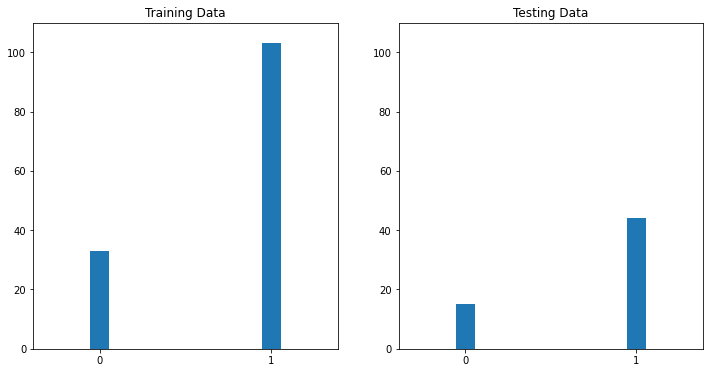

In [122]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.hist(train_y)
plt.xlim(-0.3,1.3)
plt.ylim(0, 110)
plt.xticks(ticks=[0.05,0.95], labels=[0,1])
plt.title('Training Data')

plt.subplot(122)
plt.hist(test_y)
plt.xlim(-0.3,1.3)
plt.ylim(0, 110)
plt.xticks(ticks=[0.05,0.95], labels=[0,1])
plt.title('Testing Data')
plt.show()

### 정규화 : Standardization(표준정규화) with Standard Scaler

- 설명변수(X) 내 변수별 평균이 0이 되도록 변환
- Training Data를 기준으로 Scaler를 구성한 뒤, Testing Data에 Scaler를 적용

#### $$ z = \frac{(x - \mu)}{\sigma} $$

In [17]:
train_X.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,...,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000
mean,153.6938,196.1580,116.5645,0.0060,0.0000,0.0031,0.0034,0.0094,0.0298,0.2825,...,0.0248,0.0468,0.0216,21.8365,0.5037,0.7217,-5.6542,0.2344,2.3817,0.2081
std,42.2130,90.5322,43.9979,0.0039,0.0000,0.0023,0.0024,0.0069,0.0183,0.1888,...,0.0176,0.0288,0.0282,4.1774,0.1015,0.0537,1.0299,0.0798,0.3836,0.0864
min,88.3330,102.1450,65.7820,0.0018,0.0000,0.0008,0.0010,0.0023,0.0096,0.0850,...,0.0073,0.0140,0.0006,8.4410,0.2637,0.5743,-7.9650,0.0568,1.4233,0.0445
25%,116.6085,133.0250,84.4005,0.0036,0.0000,0.0017,0.0019,0.0051,0.0168,0.1535,...,0.0133,0.0254,0.0062,19.3432,0.4258,0.6828,-6.3324,0.1823,2.0765,0.1467
50%,149.2395,174.4020,104.3760,0.0050,0.0000,0.0025,0.0027,0.0075,0.0233,0.2185,...,0.0186,0.0384,0.0117,22.0000,0.5017,0.7239,-5.6591,0.2217,2.3759,0.2002
75%,181.6135,219.5462,141.2848,0.0071,0.0001,0.0037,0.0039,0.0111,0.0378,0.3485,...,0.0309,0.0571,0.0250,25.0248,0.5875,0.7630,-5.0197,0.2892,2.6145,0.2527
max,260.1050,588.5180,239.1700,0.0311,0.0002,0.0180,0.0196,0.0540,0.1191,1.3020,...,0.1378,0.1694,0.2171,33.0470,0.6852,0.8253,-2.4340,0.4505,3.4136,0.5274


In [18]:
# 정규화
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [19]:
pd.DataFrame(train_X, columns = X.columns).describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,...,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000,136.0000
mean,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,...,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000
std,1.0037,1.0037,1.0037,1.0037,1.0037,1.0037,1.0037,1.0037,1.0037,1.0037,...,1.0037,1.0037,1.0037,1.0037,1.0037,1.0037,1.0037,1.0037,1.0037,1.0037
min,-1.5541,-1.0423,-1.1585,-1.0835,-1.3369,-1.0338,-0.9746,-1.0325,-1.1125,-1.0504,...,-0.9976,-1.1437,-0.7458,-3.2185,-2.3745,-2.7575,-2.2519,-2.2320,-2.5075,-1.9010
25%,-0.8818,-0.6999,-0.7337,-0.6208,-0.4606,-0.6301,-0.5848,-0.6291,-0.7180,-0.6862,...,-0.6544,-0.7469,-0.5475,-0.5991,-0.7705,-0.7281,-0.6609,-0.6552,-0.7986,-0.7136
50%,-0.1059,-0.2412,-0.2780,-0.2651,-0.4606,-0.2785,-0.2614,-0.2793,-0.3587,-0.3405,...,-0.3497,-0.2922,-0.3534,0.0393,-0.0198,0.0414,-0.0047,-0.1592,-0.0150,-0.0924
75%,0.6638,0.2593,0.5639,0.2911,0.3015,0.2478,0.2280,0.2466,0.4372,0.3507,...,0.3500,0.3588,0.1191,0.7660,0.8286,0.7729,0.6184,0.6890,0.6092,0.5181
max,2.5301,4.3499,2.7969,6.4669,4.4927,6.4496,6.7302,6.4513,4.9056,5.4207,...,6.4466,4.2780,6.9560,2.6935,1.7948,1.9374,3.1382,2.7168,2.7000,3.7105


## 1-2. 모델링: Multilayer Perceptron (MLP) Classifier

### MLP Classifier 구조
<img src='./LG_time_series_day08/image/image01.png' width='600'></img>
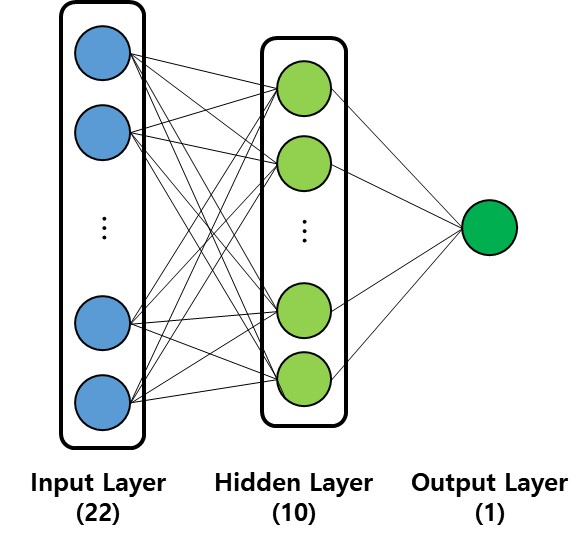

### MLP Classifier 정의
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html'> Scikit-Learn MLP Classifier Manual </a>
- <b>hiddent_layer_sizes</b> - hidden layer 개수 
- <b>activation</b> - activation function 타입 (identity, logistic, tanh, <font color='red'>relu</font>)
- <b>solver    </b> - 경사하강법의 종류 (<font color='red'>adam</font>, sgd, lbfgs) <br>
- <b>batch_size</b> - 모델에 한번에 입력되는 데이터의 수 
- <b>learning_rate_init</b> - 한번 업데이트 하는 step size
- <b>max_iter </b> - 최대 학습 횟수 ( = Epochs )
- <b>verbose </b> - 학습 진행과정 출력 여부
- <b>random_state </b> - 랜덤시드

<img src='./LG_time_series_day08/image/image02.png' width='600'></img><br>
<img src="https://t1.daumcdn.net/cfile/tistory/9906BE3D5A3A642E06" width="600"></img><br>
<a href='https://t1.daumcdn.net/cfile/tistory/9906BE3D5A3A642E06'> https://t1.daumcdn.net/cfile/tistory/9906BE3D5A3A642E06 </a>

In [95]:
clf_mlp = MLPClassifier(hidden_layer_sizes=10,
                        activation='relu',
                        solver='adam',
                        batch_size=32,
                        learning_rate_init=0.01,
                        max_iter=200,
                        verbose=True,
                        random_state=0)

### MLP Classifier 학습

In [96]:
clf_mlp.fit(train_X, train_y)

Iteration 1, loss = 0.77440665
Iteration 2, loss = 0.56081993
Iteration 3, loss = 0.46291641
Iteration 4, loss = 0.41323716
Iteration 5, loss = 0.37887289
Iteration 6, loss = 0.35530944
Iteration 7, loss = 0.33641919
Iteration 8, loss = 0.32004656
Iteration 9, loss = 0.30451078
Iteration 10, loss = 0.29064661
Iteration 11, loss = 0.27863652
Iteration 12, loss = 0.26757914
Iteration 13, loss = 0.25718941
Iteration 14, loss = 0.24948708
Iteration 15, loss = 0.23920358
Iteration 16, loss = 0.23015878
Iteration 17, loss = 0.22275412
Iteration 18, loss = 0.21614342
Iteration 19, loss = 0.21269404
Iteration 20, loss = 0.20559967
Iteration 21, loss = 0.19842188
Iteration 22, loss = 0.19414292
Iteration 23, loss = 0.18899688
Iteration 24, loss = 0.18428213
Iteration 25, loss = 0.17811779
Iteration 26, loss = 0.17589354
Iteration 27, loss = 0.16938183
Iteration 28, loss = 0.16334042
Iteration 29, loss = 0.15731064
Iteration 30, loss = 0.15354665
Iteration 31, loss = 0.14797726
Iteration 32, los

C:\Users\SAM\Miniconda3\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=32, hidden_layer_sizes=10, learning_rate_init=0.01,
              random_state=0, verbose=True)

### 학습 상태 확인 (learning curve)

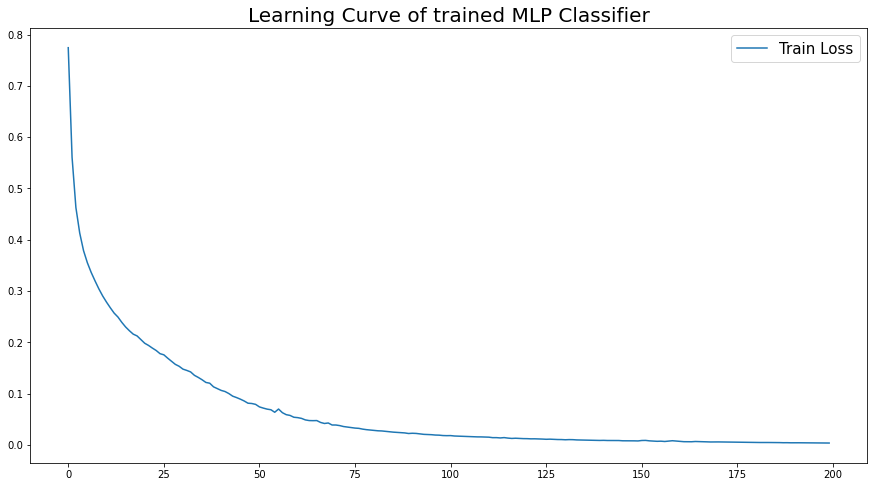

In [97]:
plt.figure(figsize=(15, 8))

train_loss_values = clf_mlp.loss_curve_
plt.plot(train_loss_values,label='Train Loss')

plt.legend(fontsize=15)
plt.title("Learning Curve of trained MLP Classifier", size=20)
plt.show()

## 1-3. Multilayer Perceptron 모델 성능 평가

### 학습된 MLP Classifier 결과 확인: Confusion Matrix

<img src="https://t1.daumcdn.net/cfile/tistory/9908B7445E8BD68332" width="400"></img><br>
<a href='https://t1.daumcdn.net/cfile/tistory/9908B7445E8BD68332'> https://t1.daumcdn.net/cfile/tistory/9908B7445E8BD68332 </a>
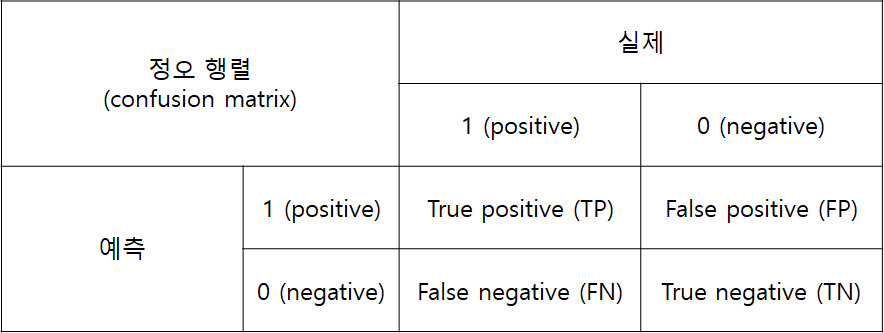

- <font color='red'>True</font> <font color='green'>Positive</font>(TP): positive class 잘 예측
- <font color='red'>False</font> <font color='green'>Negative</font>(FN): positive class를 negative class로 잘못 예측
- <font color='red'>False</font> <font color='green'>Positive</font>(FP): negative class를 positive class로 잘못 예측
- <font color='red'>True</font> <font color='green'>Negative</font>(TN): negative class 잘 예측
<br></br>

- <font color='red'>True</font>: 잘 예측한 경우
- <font color='red'>False</font>: 잘못 예측한 경우
- <font color='green'>Positive</font>(FP): 관심 대상이 되는 클래스, Parkinson's Disease
- <font color='green'>Negative</font>(TN): 관심 대상이 아닌 클래스, Healthy

### 학습된 MLP Classifier 결과 확인: Training Data

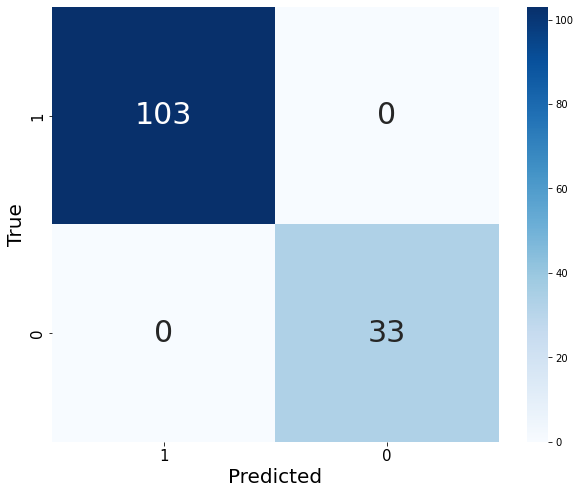

In [133]:
# 학습한 데이터에 대한 예측값
train_y_pred = clf_mlp.predict(train_X)

# confusion matrix 계산
cm_train = confusion_matrix(y_true=train_y, y_pred=train_y_pred, labels=[1,0])

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(data=cm_train, annot=True, fmt='d', annot_kws={'size': 30}, cmap='Blues')
plt.xticks(ticks=[0.5,1.5], labels=[1,0], size=15)
plt.yticks(ticks=[0.5,1.5], labels=[1,0], size=15)
plt.xlabel('Predicted', size=20)
plt.ylabel('True', size=20)
plt.show()

### 학습된 MLP Classifier 결과 확인: Testing Data

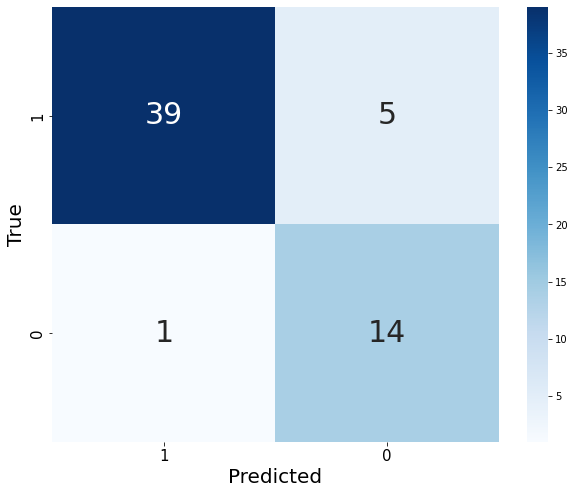

In [134]:
# 테스트 데이터에 대한 예측값
test_y_pred = clf_mlp.predict(test_X)

# confusion matrix 계산
cm_test = confusion_matrix(y_true=test_y, y_pred=test_y_pred, labels=[1,0])

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(data=cm_test, annot=True, fmt='d', annot_kws={'size': 30}, cmap='Blues')
plt.xticks(ticks=[0.5,1.5], labels=[1,0], size=15)
plt.yticks(ticks=[0.5,1.5], labels=[1,0], size=15)
plt.xlabel('Predicted', size=20)
plt.ylabel('True', size=20)
plt.show()

### 학습된 MLP Classifier 성능 평가: 다양한 평가 지표

<img src="https://t1.daumcdn.net/cfile/tistory/9908B7445E8BD68332" width="400"></img><br>
<a href='https://t1.daumcdn.net/cfile/tistory/9908B7445E8BD68332'> https://t1.daumcdn.net/cfile/tistory/9908B7445E8BD68332 </a>

#### Accuracy = $\frac{TP+TN}{TP+FP+FN+TN}$ 
#### Recall = $\frac{TP}{TP+FN}$
#### Precision = $\frac{TP}{TP+FP}$
#### F1 score = $\frac{2 \times Recall \times Precision}{Recall+Precision}$

- Accuracy: 전체 데이터중 정확히 예측한 비율
- Recall: 실제 positive class중 정확히 예측한 비율
- Precision: 예측된 positive class중 정확히 예측한 비율
- F1 socre: Recall과 Precision을 모두 고려한 평가지표

### 학습된 MLP Classifier 성능 평가: Training Data

In [135]:
train_acc = accuracy_score(train_y, train_y_pred)
train_rec = recall_score(train_y, train_y_pred)
train_prec = precision_score(train_y, train_y_pred)
train_f1 = f1_score(train_y, train_y_pred)


print('Train Accuracy   : {:.3f}'.format(train_acc))
print('Train Sensitivity: {:.3f}'.format(train_rec))
print('Train Precision  : {:.3f}'.format(train_prec))
print('Train F1 Score   : {:.3f}'.format(train_f1))

Train Accuracy   : 1.000
Train Sensitivity: 1.000
Train Precision  : 1.000
Train F1 Score   : 1.000


### 학습된 MLP Classifier 성능 평가: Testing Data

In [136]:
test_acc = accuracy_score(test_y, test_y_pred)
test_rec = recall_score(test_y, test_y_pred)
test_prec = precision_score(test_y, test_y_pred)
test_f1 = f1_score(test_y, test_y_pred)

print('Test Accuracy   : {:.3f}'.format(test_acc))
print('Test Recall     : {:.3f}'.format(test_rec))
print('Test Precision  : {:.3f}'.format(test_prec))
print('Test F1 Score   : {:.3f}'.format(test_f1))

Test Accuracy   : 0.898
Test Recall     : 0.886
Test Precision  : 0.975
Test F1 Score   : 0.929


---

## 2. 분석데이터 : Toyota Corolla (회귀 문제)

### 설명변수 (X)
- Mfg_Month
- Mfg_Year
- KM
- Fuel_Type
...
- Radio_cassette
- Tow_Bar

### 반응변수 (Y)
- Price

## 2-1. 데이터 전처리 및 탐색적 데이터 분석

### 데이터 불러오기

In [137]:
data = pd.read_csv('./LG_time_series_day08/data/toyotacorolla.csv')

### 데이터 확인

In [138]:
print('Data shape: {}'.format(data.shape))
data.head(2)

Data shape: (1436, 37)


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [139]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,...,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000
mean,721.5550,10730.8245,55.9471,5.5487,1999.6253,68533.2597,101.5021,0.6748,0.0557,1576.8558,...,0.5801,0.5620,0.9777,0.1462,0.2570,0.3001,0.7702,0.2047,0.1455,0.2779
std,416.4769,3626.9646,18.6000,3.3541,1.5407,37506.4489,14.9811,0.4686,0.2294,424.3868,...,0.4937,0.4963,0.1477,0.3535,0.4371,0.4585,0.4209,0.4036,0.3528,0.4481
min,1.0000,4350.0000,1.0000,1.0000,1998.0000,1.0000,69.0000,0.0000,0.0000,1300.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,361.7500,8450.0000,44.0000,3.0000,1998.0000,43000.0000,90.0000,0.0000,0.0000,1400.0000,...,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
50%,721.5000,9900.0000,61.0000,5.0000,1999.0000,63389.5000,110.0000,1.0000,0.0000,1600.0000,...,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
75%,1081.2500,11950.0000,70.0000,8.0000,2001.0000,87020.7500,110.0000,1.0000,0.0000,1600.0000,...,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000
max,1442.0000,32500.0000,80.0000,12.0000,2004.0000,243000.0000,192.0000,1.0000,1.0000,16000.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### 불필요한 변수 제거

In [140]:
# Id, Model column 고유 개수
num_id = len(data['Id'].unique())
num_model = len(data['Model'].unique())

print(f'ID: {num_id}')
print(f'Model: {num_model}')

ID: 1436
Model: 372


In [141]:
# 변수 제거
data.drop(columns=['Id', 'Model'], axis=1, inplace=True)

### 범주형 설명변수에 대한 Dummy 변수 생성

In [142]:
display(data['Fuel_Type'])
display(data.groupby('Fuel_Type')['Fuel_Type'].count())

0       Diesel
1       Diesel
2       Diesel
3       Diesel
4       Diesel
         ...  
1431    Petrol
1432    Petrol
1433    Petrol
1434    Petrol
1435    Petrol
Name: Fuel_Type, Length: 1436, dtype: object

Fuel_Type
CNG         17
Diesel     155
Petrol    1264
Name: Fuel_Type, dtype: int64

### 원핫인코딩

<img src="https://z-images.s3.amazonaws.com/d/d5/MtimFxh.png" width="600"></img><br>
<a href='https://z-images.s3.amazonaws.com/d/d5/MtimFxh.png'> https://z-images.s3.amazonaws.com/d/d5/MtimFxh.png </a>

In [143]:
# 원핫인코딩
data_new = pd.get_dummies(data)

In [144]:
data.head(2)

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,Diesel,90,1,0,2000,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,Diesel,90,1,0,2000,...,1,0,1,0,0,0,1,0,0,0


In [145]:
data_new.head(2)

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0


### 설명변수(X)와 반응변수(Y) 정의

In [146]:
X = data_new.drop(labels='Price', axis=1)
y = data_new['Price']

### 학습데이터(Training Dataset)와 테스트 데이터(Testing Dataset) 분리

In [147]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

### 정규화 : Standardization(표준정규화) with Standard Scaler

In [148]:
train_X.describe()

,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
count,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,...,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000
mean,55.8706,5.5353,1999.6328,68369.1284,101.8507,0.6657,0.0547,1582.6328,4.0507,4.0000,...,0.1502,0.2697,0.2896,0.7562,0.2139,0.1493,0.2876,0.0139,0.1055,0.8806
std,18.5076,3.3717,1.5324,36947.6982,15.2562,0.4720,0.2276,491.4172,0.9533,0.0000,...,0.3575,0.4440,0.4538,0.4296,0.4103,0.3565,0.4529,0.1173,0.3073,0.3244
min,1.0000,1.0000,1998.0000,1.0000,69.0000,0.0000,0.0000,1300.0000,2.0000,4.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,44.0000,3.0000,1998.0000,43000.0000,90.0000,0.0000,0.0000,1400.0000,3.0000,4.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
50%,60.0000,5.0000,1999.0000,63634.0000,110.0000,1.0000,0.0000,1600.0000,4.0000,4.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
75%,70.0000,8.0000,2001.0000,86860.0000,110.0000,1.0000,0.0000,1600.0000,5.0000,4.0000,...,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000
max,80.0000,12.0000,2004.0000,232940.0000,192.0000,1.0000,1.0000,16000.0000,5.0000,4.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [149]:
# 정규화
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [150]:
pd.DataFrame(train_X, columns = X.columns).describe()

,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
count,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,...,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000
mean,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,...,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000
std,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,0.0000,...,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005
min,-2.9662,-1.3458,-1.0661,-1.8513,-2.1543,-1.4111,-0.2406,-0.5754,-2.1523,0.0000,...,-0.4205,-0.6076,-0.6384,-1.7613,-0.5217,-0.4189,-0.6353,-0.1189,-0.3434,-2.7157
25%,-0.6417,-0.7523,-1.0661,-0.6870,-0.7772,-1.4111,-0.2406,-0.3718,-1.1028,0.0000,...,-0.4205,-0.6076,-0.6384,0.5678,-0.5217,-0.4189,-0.6353,-0.1189,-0.3434,0.3682
50%,0.2232,-0.1588,-0.4132,-0.1282,0.5344,0.7087,-0.2406,0.0354,-0.0533,0.0000,...,-0.4205,-0.6076,-0.6384,0.5678,-0.5217,-0.4189,-0.6353,-0.1189,-0.3434,0.3682
75%,0.7638,0.7313,0.8926,0.5007,0.5344,0.7087,-0.2406,0.0354,0.9963,0.0000,...,-0.4205,1.6457,1.5664,0.5678,-0.5217,-0.4189,1.5740,-0.1189,-0.3434,0.3682
max,1.3044,1.9183,2.8514,4.4564,5.9120,0.7087,4.1560,29.3530,0.9963,0.0000,...,2.3782,1.6457,1.5664,0.5678,1.9169,2.3875,1.5740,8.4134,2.9122,0.3682


## 2-2. 모델링: Multilayer Perceptron (MLP) Regressor

### MLP Regressor 정의
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html'> Scikit-Learn MLP Regressor Manual </a>

- <b>hiddent_layer_sizes</b> - hidden layer 개수 
- <b>activation</b> - activation function 타입 (identity, logistic, tanh, <font color='red'>relu</font>)
- <b>solver    </b> - 경사하강법의 종류 (<font color='red'>adam</font>, sgd, lbfgs) <br>
- <b>batch_size</b> - 모델에 한번에 입력되는 데이터의 수 
- <b>learning_rate_init</b> - 한번 업데이트 하는 step size
- <b>max_iter </b> - 최대 학습 횟수 ( = Epochs )
- <b>verbose </b> - 학습 진행과정 출력 여부
- <b>random_state </b> - 랜덤시드

In [151]:
reg_mlp = MLPRegressor(hidden_layer_sizes=10,
                        activation='relu',
                        solver='adam',
                        batch_size=32,
                        learning_rate_init=0.01,
                        max_iter=200,
                        verbose=True,
                        random_state=0)

### MLP Regressor 학습

In [152]:
reg_mlp.fit(train_X, train_y)

Iteration 1, loss = 64419601.08226715
Iteration 2, loss = 64294639.19394051
Iteration 3, loss = 64024218.26019809
Iteration 4, loss = 63514519.34383095
Iteration 5, loss = 62707949.39091169
Iteration 6, loss = 61578925.59503384
Iteration 7, loss = 60214948.65019997
Iteration 8, loss = 58587981.05396108
Iteration 9, loss = 56760577.18709214
Iteration 10, loss = 54757598.44985057
Iteration 11, loss = 52577620.46768776
Iteration 12, loss = 50330102.66322356
Iteration 13, loss = 47966603.55587254
Iteration 14, loss = 45582176.17039374
Iteration 15, loss = 43170062.72985516
Iteration 16, loss = 40819898.60481635
Iteration 17, loss = 38404115.64073048
Iteration 18, loss = 36123654.13174423
Iteration 19, loss = 33902972.03176385
Iteration 20, loss = 31762800.99334367
Iteration 21, loss = 29759847.85589677
Iteration 22, loss = 27894840.83915199
Iteration 23, loss = 26131961.07964867
Iteration 24, loss = 24506755.91274603
Iteration 25, loss = 23023504.91574402
Iteration 26, loss = 21654812.7805

C:\Users\SAM\Miniconda3\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=32, hidden_layer_sizes=10, learning_rate_init=0.01,
             random_state=0, verbose=True)

### 학습 상태 확인 (learning curve)

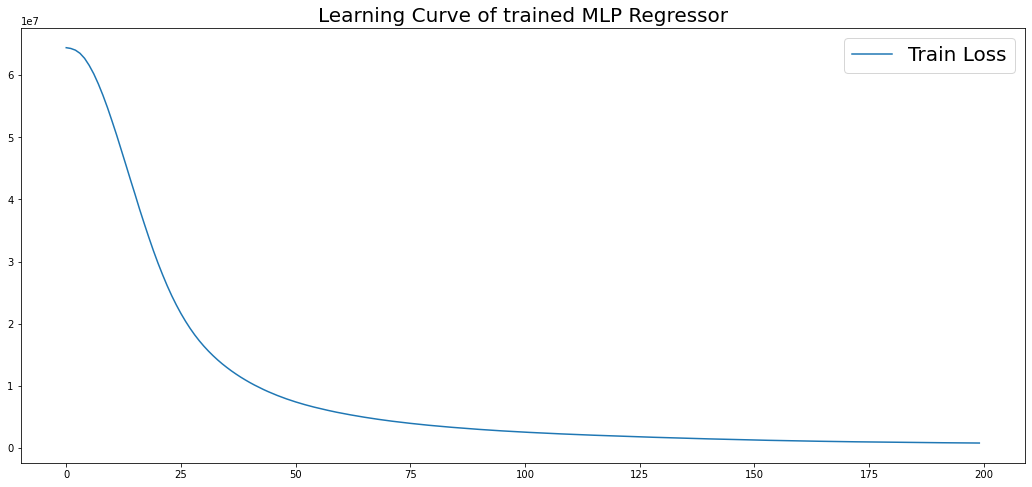

In [154]:
plt.figure(figsize=(18,8))

train_loss_values = reg_mlp.loss_curve_
plt.plot(train_loss_values,label='Train Loss')

plt.legend(fontsize=20)
plt.title("Learning Curve of trained MLP Regressor", fontsize=20)
plt.show()

## 2-3. Multilayer Perceptron 모델 성능 평가

### 학습된 MLP Regressor 성능 평가: 다양한 평가 지표

#### MAE = $\frac{1}{n} \sum_{i=1}^n \left\vert{y_i}-\hat{y_i}\right\vert$ 
#### MSE = $\frac{1}{n} \sum_{i=1}^n ({y_i}-\hat{y_i})^2$ 
#### MAPE = $\frac{1}{n} \sum_{i=1}^n \frac{\left\vert{y_i}-\hat{y_i}\right\vert}{max(\epsilon, \left\vert{y_i}\right\vert)}$ 
#### R2 = $1 - \frac{\sum_{i=1}^n({y_i}-{\hat{y_i}})^2}{\sum_{i=1}^n({y_i}-{\bar{y}})^2} $

- n: 데이터 개수
- $y_i$: 실제값
- $\hat{y_i}$: 예측값
- $\bar{y}$: 실제값의 평균
<br></br>
- Mean Absolute Error (MAE): 오차 절대값의 평균
- Mean Squared Error (MSE): 오차 제곱의 평균
- Mean Absolute Percentage Error (MAPE): 최대값 대비 오차의 평균
- $R^2$: 평균 대비 오차의 평균

### 학습된 MLP Regressor 결과 확인 및 성능 평가 : Training Data

In [155]:
# 학습한 데이터에 대한 예측값
train_y_pred = reg_mlp.predict(train_X)

train_mae = mean_absolute_error(train_y, train_y_pred)
train_mse = mean_squared_error(train_y, train_y_pred)
train_mape = mean_absolute_percentage_error(train_y, train_y_pred)
train_r2 = r2_score(train_y, train_y_pred)

print('Train MAE  : {:.3f}'.format(train_mae))
print('Train MSE  : {:.3f}'.format(train_mse))
print('Train MAPE : {:.3f}'.format(train_mape))
print('Train R2   : {:.3f}'.format(train_r2))

Train MAE  : 955.324
Train MSE  : 1621648.641
Train MAPE : 0.097
Train R2   : 0.877


### 학습된 MLP Regressor 결과 확인 및 성능 평가 : Testing Data

In [156]:
# 학습한 데이터에 대한 예측값
test_y_pred = reg_mlp.predict(test_X)

test_mae = mean_absolute_error(test_y, test_y_pred)
test_mse = mean_squared_error(test_y, test_y_pred)
test_mape = mean_absolute_percentage_error(test_y, test_y_pred)
test_r2 = r2_score(test_y, test_y_pred)

print('Test MAE  : {:.3f}'.format(test_mae))
print('Test MSE  : {:.3f}'.format(test_mse))
print('Test MAPE : {:.3f}'.format(test_mape))
print('Test R2   : {:.3f}'.format(test_r2))

Test MAE  : 1029.431
Test MSE  : 1734126.477
Test MAPE : 0.105
Test R2   : 0.867


### MLP Regressor 예측 결과 결과 확인 : Testing Data

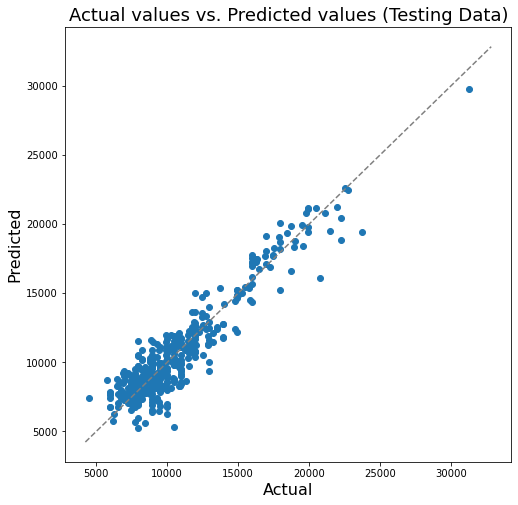

In [158]:
# 산점도 그래프
fig_values = np.concatenate([test_y.squeeze(), test_y_pred.squeeze()])
vmin = np.min(fig_values) * 0.95
vmax = np.max(fig_values) * 1.05

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Testing Data)', size=18)
plt.scatter(test_y, test_y_pred)
plt.plot([vmin, vmax], [vmin, vmax], color='grey', linestyle='dashed')
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.show()